
# Anisotropic Multifractional Brownian field 2

.. codeauthor:: Frédéric Richard <frederic.richard_at_univ-amu.fr>

In this example, we show how to simulate heterogeneous textures whose
anisotropy spatially varies. Such textures can be obtained
by simulating a turning band field with a space-dependent Hurst function
represented as a step function.

Here, the Hurst function $\beta_{(x,y)}$ is defined at position
$(x, y)$ by changing linearly a Hurst constant. The directional
properties of the generated texture vary in the vertical direction from
anisotropic to isotropic while its roughness remains the same.

<div class="alert alert-info"><h4>Note</h4><p>Such simulations are related to the so-called
  **anisotropic multifractional Brownian field**
  which was investigated :cite:p:`Vu2020`. In a harmonizable
  representation, these fields are defined as

  .. math::
      Z(x, y) = \int_{\mathbb{R}^2}
      (e^{i\langle (x, y), w \rangle} -1 ) \tau_{(x, y)}(w)
      \vert w \vert^{-\beta_{x, y}(w) -1}
      dW(w),

  where $dW$ stands for a complex Brownian measure.</p></div>


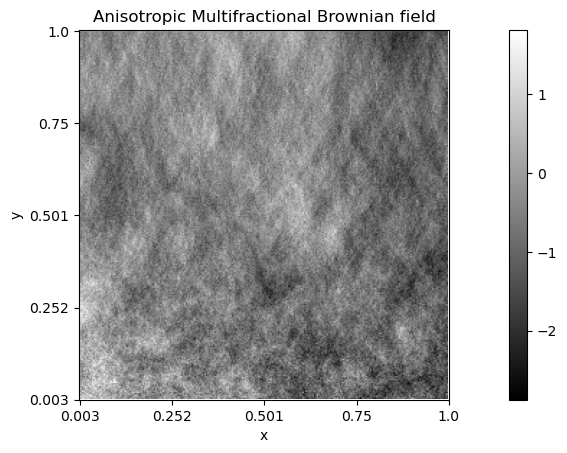

In [1]:
import numpy as np
from afbf import coordinates, sdata, tbfield

N = 256  # Image size.

pid = np.pi / 5  # length of a step of the Hurst function.
dpid = np.pi / 16  # length of the transition between steps.

h0 = 0.1  # Hurst index at (x, y) with y=0.
h1 = 0.9  # Hurst index at (x, y) with y=N-1.

pid = np.pi / 16  # length of a step of the Hurst function.
dpid = np.pi / 6  # length of the transition between steps.
h0 = 0.1
h1 = 0.9

# Define a field.
Z = tbfield('afbf-smooth')
# Set step interval bounds.
Z.hurst.ChangeParameters(
        np.array([[h1, h0]]),
        np.array([[-pid - dpid, -pid, pid, pid + dpid]])
    )
Z.hurst.trans = 1  # Indicate where step transitions are.

# Set coordinates.
coord = coordinates(N)  # field coordinates.
coordy = coordinates()  # subset of coordinates.
x = np.reshape(np.arange(1, N+1), (N, 1))

# Initialize an image.
z = sdata(coord)
z.name = 'Anisotropic Multifractional Brownian field'

for y in range(N):
    # Rescale the Hurst function.
    t = y / (N - 1)
    h = h0 * t + h1 * (1 - t)
    # Change the step constants.
    Z.hurst.ChangeParameters(
        np.array([h, h0])
    )
    # Normalization.
    Z.NormalizeModel()

    # Restrict to coordinates (:, y).
    coordy.DefineNonUniformLocations(
        np.concatenate((x, (y+1) * np.ones((N, 1))), axis=1))
    coordy.N = coord.N

    # Simulate the current field keeping a same random seed.
    np.random.seed(1)
    zy = Z.Simulate(coordy)

    # Keep the simulation at positions  (y:-1, :).
    z.values.reshape(N, N)[y, :] = zy.values.reshape(1, N)[0, 0:N]

# Display the simulation.
z.Display()